<a href="https://colab.research.google.com/github/am-onebit/practice/blob/main/DarkNet_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
pd.set_option('display.max_columns', None)

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
#"url_1 = 'https://github.com/am-onebit/practice/tree/main/Data/Darknet.csv'\n",
#"df= pd.read_csv(url_1)\n",
url = "https://raw.githubusercontent.com/am-onebit/practice/main/Data/DarkNet.csv"

# Load the dataset
df = pd.read_csv(url)

In [ ]:
# lets try to look the first 5 rows
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets/s,Bwd_Packets/s,Packet_Length_Min,Packet_Length_Max,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Fwd_Segment_Size_Avg,Bwd_Segment_Size_Avg,Fwd_Bytes/Bulk_Avg,Fwd_Packet/Bulk_Avg,Fwd_Bulk_Rate_Avg,Bwd_Bytes/Bulk_Avg,Bwd_Packet/Bulk_Avg,Bwd_Bulk_Rate_Avg,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
0,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
1,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
2,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
3,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
4,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1437760000000000,3117718.131,1437760000000000,1437760000000000,Non-Tor,AUDIO-STREAMING


In [ ]:
def dataset_statistics(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    print(f"Column names: {column_names}\n")
    print("Any Duplicated Values: {}\n".format(df.duplicated().any())) # check duplicated values
    print("Data types:")
    print(data_types)

In [ ]:
# check the statistics of dataset
dataset_statistics(df)

Total rows: 68580

Total columns: 83

Column names: ['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s', 'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Fl

* The dataset contains 68580 rows and 83 columns. Upon inspection, it appears that there are duplicated values present.

In [ ]:
df[df.duplicated()] # check the duplicated rows

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets/s,Bwd_Packets/s,Packet_Length_Min,Packet_Length_Max,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Fwd_Segment_Size_Avg,Bwd_Segment_Size_Avg,Fwd_Bytes/Bulk_Avg,Fwd_Packet/Bulk_Avg,Fwd_Bulk_Rate_Avg,Bwd_Bytes/Bulk_Avg,Bwd_Packet/Bulk_Avg,Bwd_Bulk_Rate_Avg,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
8431,8.6.0.1,0,8.0.6.4,0,0,22,2,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0,90909.090910,22.0,0.000000,22,22,22,22.0,0.000000,22,22,0,0.0,0.0,0,0,0,0,0,0,0,0,90909.090910,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NonVPN,Chat
13475,131.202.243.49,50309,224.0.0.252,5355,17,420968,2,0,44,0,22,22,22.0,0.000000,0,0,0.0,0.0,104.521009,4.750955,420968.0,0.000000,420968,420968,420968,420968.0,0.000000,420968,420968,0,0.0,0.0,0,0,0,0,0,0,16,0,4.750955,0.000000,22,22,22.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,33.0,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0,0.0,0,0,NonVPN,Chat
19424,131.202.240.183,50108,224.0.0.251,5353,17,140,3,0,135,0,45,45,45.0,0.000000,0,0,0.0,0.0,964285.7143,21428.571430,70.0,86.267027,131,9,140,70.0,86.267027,131,9,0,0.0,0.0,0,0,0,0,0,0,24,0,21428.571430,0.000000,45,45,45.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,60.0,45.0,0.0,0,0,0,0,0,0,1,45,0,0,0,0,2,8,0,0,0,0,1432570000000000,0.0,1432570000000000,1432570000000000,NonVPN,Email
21048,131.202.240.102,56046,224.0.0.252,5355,17,422958,2,0,44,0,22,22,22.0,0.000000,0,0,0.0,0.0,104.029242,4.728602,422958.0,0.000000,422958,422958,422958,422958.0,0.000000,422958,422958,0,0.0,0.0,0,0,0,0,0,0,16,0,4.728602,0.000000,22,22,22.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,33.0,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0,0.0,0,0,NonVPN,Email
21262,131.202.240.102,54281,224.0.0.252,5355,17,429674,2,0,44,0,22,22,22.0,0.000000,0,0,0.0,0.0,102.403217,4.654692,429674.0,0.000000,429674,429674,429674,429674.0,0.000000,429674,429674,0,0.0,0.0,0,0,0,0,0,0,16,0,4.654692,0.000000,22,22,22.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,33.0,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0,0.0,0,0,NonVPN,Email
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61074,10.0.2.15,60031,195.154.82.180,443,6,296,1,1,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0,6756.756757,296.0,0.000000,296,296,0,0.0,0.000000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,3378.378378,3378.378378,0,0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,41811,65535,0,20,0,0,0,0,0,0.0,0,0,Tor,Audio-Streaming
64145,10.8.0.10,54685,134.170.18.175,443,6,38,2,0,1,0,1,0,0.5,0.707107,0,0,0.0,0.0,26315.78947,52631.578950,38.0,0.000000,38,38,38,38.0,0.000000,38,38,0,0.0,0.0,0,0,0,0,0,0,64,0,52631.578950,0.000000,0,1,0.666667,0.577350,0.333333,0,0,0,0,2,0,0,0,0,1.0,0.5,0.0,0,0,0,0,0,0,1,0,0,0,6

In [ ]:
df.drop_duplicates(subset=None, keep="first", inplace=True) # remove the duplicated rows

In [ ]:
df['Label-1'].value_counts() # check distribution of label

Label-1
Non-Tor    25303
NonVPN     22719
VPN        13514
Tor         1219
Name: count, dtype: int64

In [ ]:
# check the statistics of dataset after removing duplicated rows
dataset_statistics(df)

Total rows: 62755

Total columns: 83

Column names: ['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s', 'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Fl

In [ ]:
# lets ensure data types match
data_types = df.dtypes.to_frame().rename(columns={0:'dtypes'})
print(tabulate(data_types, headers = 'keys', tablefmt = 'psql'))

+----------------------------+----------+
|                            | dtypes   |
|----------------------------+----------|
| Src_IP                     | object   |
| Src_Port                   | int64    |
| Dst_IP                     | object   |
| Dst_Port                   | int64    |
| Protocol                   | int64    |
| Flow_Duration              | int64    |
| Total_Fwd_Packet           | int64    |
| Total_Bwd_packets          | int64    |
| Total_Length_of_Fwd_Packet | int64    |
| Total_Length_of_Bwd_Packet | int64    |
| Fwd_Packet_Length_Max      | int64    |
| Fwd_Packet_Length_Min      | int64    |
| Fwd_Packet_Length_Mean     | float64  |
| Fwd_Packet_Length_Std      | float64  |
| Bwd_Packet_Length_Max      | int64    |
| Bwd_Packet_Length_Min      | int64    |
| Bwd_Packet_Length_Mean     | float64  |
| Bwd_Packet_Length_Std      | float64  |
| Flow_Bytes/s               | object   |
| Flow_Packets/s             | float64  |
| Flow_IAT_Mean              | flo

* From above, we can see that Flow_Bytes/s should be dtype numeric but its in string format so, we need to handle.

In [ ]:
df['Flow_Bytes/s'].dtype # check dtype of Flow_Bytes/s

dtype('O')

In [ ]:
df[df['Flow_Bytes/s'] == '?'][['Flow_Bytes/s']]

,Flow_Bytes/s
564,?
594,?
664,?
665,?
878,?
882,?
912,?
937,?
994,?
1340,?


* From above, we can see that some ? in `Flow_Bytes/s` features so we need to replace with null values.

In [ ]:
df['Flow_Bytes/s'] = df['Flow_Bytes/s'].replace('?', np.nan) #lets fill with null values

In [ ]:
df['Flow_Bytes/s'] = df['Flow_Bytes/s'].astype(float) # convert string to float

In [ ]:
df['Flow_Bytes/s'].dtype # again check the dtypes

dtype('float64')

In [ ]:
# Calculate the count of unique values for each column
unique_value_counts = df.nunique()
unique_counts_df = pd.DataFrame({'Column': unique_value_counts.index, 'Unique Count': unique_value_counts.values})
print(tabulate(unique_counts_df, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------+----------------+
|    | Column                     |   Unique Count |
|----+----------------------------+----------------|
|  0 | Src_IP                     |           2195 |
|  1 | Src_Port                   |          23420 |
|  2 | Dst_IP                     |           4863 |
|  3 | Dst_Port                   |           6780 |
|  4 | Protocol                   |              3 |
|  5 | Flow_Duration              |          47462 |
|  6 | Total_Fwd_Packet           |           1915 |
|  7 | Total_Bwd_packets          |           1896 |
|  8 | Total_Length_of_Fwd_Packet |           6085 |
|  9 | Total_Length_of_Bwd_Packet |           6680 |
| 10 | Fwd_Packet_Length_Max      |           1283 |
| 11 | Fwd_Packet_Length_Min      |            210 |
| 12 | Fwd_Packet_Length_Mean     |           9358 |
| 13 | Fwd_Packet_Length_Std      |          10928 |
| 14 | Bwd_Packet_Length_Max      |           1254 |
| 15 | Bwd_Packet_Length_Min      |           

In [ ]:
numeric_features = []
categorical_features = []

#splitting features into numeric and categoric
'''
whicheve feature has more than 20 category appending on numeric_featrues and remaining are appending in categoric_features
'''

for col in df.columns:
  if df[col].nunique()>20:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Flow_Duration', 'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s', 'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'PSH_Flag_Count', 'ACK_Flag_Count', 'Down/Up_Ratio', 'Average_Packet_Size', 'Fwd_Segment_Size_Avg', 'Bwd_Segment_Size_Avg', 'Bwd_Packet/Bulk_Avg', 'Bwd_Bulk_Rate_Avg', 'Subflo

In [ ]:
# lets Check for and address any inconsistent values in categorical columns.
def check_categorical_unique_values(categorical_columns):
    for col in categorical_columns:
        unique_values = df[col].unique()
        value_counts = df[col].value_counts()
        print(f">> Unique values in column '{col}':")
        for value in unique_values:
            count = value_counts.get(value, 0)
            print(f"\t| {value}: {count} occurrences")

In [ ]:
check_categorical_unique_values(categorical_features)

>> Unique values in column 'Protocol':
	| 6: 31263 occurrences
	| 17: 30736 occurrences
	| 0: 756 occurrences
>> Unique values in column 'Fwd_PSH_Flags':
	| 0: 57120 occurrences
	| 1: 5635 occurrences
>> Unique values in column 'Bwd_PSH_Flags':
	| 0: 62755 occurrences
>> Unique values in column 'Fwd_URG_Flags':
	| 0: 62755 occurrences
>> Unique values in column 'Bwd_URG_Flags':
	| 0: 62755 occurrences
>> Unique values in column 'FIN_Flag_Count':
	| 2: 1188 occurrences
	| 1: 18734 occurrences
	| 0: 42833 occurrences
>> Unique values in column 'SYN_Flag_Count':
	| 0: 51851 occurrences
	| 2: 10814 occurrences
	| 3: 80 occurrences
	| 1: 9 occurrences
	| 4: 1 occurrences
>> Unique values in column 'RST_Flag_Count':
	| 0: 60442 occurrences
	| 1: 1535 occurrences
	| 2: 470 occurrences
	| 3: 262 occurrences
	| 4: 20 occurrences
	| 6: 10 occurrences
	| 10: 3 occurrences
	| 16: 1 occurrences
	| 5: 4 occurrences
	| 71: 1 occurrences
	| 7: 2 occurrences
	| 8: 3 occurrences
	| 9: 2 occurrences
>> U

* The dataset presents various network traffic features and their unique value distributions. Most flags such as Bwd_PSH_Flags, Fwd_URG_Flags, and several bulk metrics have a singular unique value, indicating no variation. The Protocol and Label-2 columns display multiple unique values with varying occurrences, suggesting diverse types of network traffic and activities captured in the data. This implies a mixture of traffic behaviors, which is useful for detailed network analysis and potential anomaly detection.

In [ ]:
# Replace Inf values with NaN if any
df = df.replace([np.inf, -np.inf], np.nan)

In [ ]:
def get_overall_info_about_dataset(df):
    '''
    lets try to check the percentage of missing values,unique values,percentage of one catagory values
    and type against each column.
    '''
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
    print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

In [ ]:
get_overall_info_about_dataset(df)

+----+----------------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature                    |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+----------------------------+-----------------+-------------------+------------------------------+---------|
| 19 | Flow_Packets/s             |           44902 |         0.0780814 |                     0.280456 | float64 |
|  0 | Src_IP                     |            2195 |         0         |                    35.3948   | object  |
| 53 | CWE_Flag_Count             |               1 |         0         |                   100        | int64   |
| 60 | Fwd_Packet/Bulk_Avg        |               1 |         0         |                   100        | int64   |
| 59 | Fwd_Bytes/Bulk_Avg         |               1 |         0         |                   100        | int64   |
| 58 | Bwd_Segment_Size_Avg       |            8643 |         0         |       

* From the table above, it is evident that several features have only one unique value, which indicates that these features do not provide any meaningful information for analysis or modeling. Therefore, it is recommended to drop these features from the dataset to avoid unnecessary computation and potential overfitting.

In [ ]:
def drop_high_categrocal_features(df, threshold=95):
  # lets remove the features which has only one category value equal to 100% and missing value >=95%
  # because that are not good for model prediction
  stats = []
  for col in df.columns[:-1]:
      stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
  stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
  df_ = stats_df.sort_values('% MissingValues', ascending=False)
  one_category_value = df_[(df_['% highOneCategoricalValues']>=threshold) | (df_['% MissingValues']>=95)]
  print(tabulate(one_category_value, headers = 'keys', tablefmt = 'psql'))
  return one_category_value

In [ ]:
one_category_value = drop_high_categrocal_features(df, threshold=100)

+----+---------------------+-----------------+-------------------+------------------------------+--------+
|    | Feature             |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type   |
|----+---------------------+-----------------+-------------------+------------------------------+--------|
| 53 | CWE_Flag_Count      |               1 |                 0 |                          100 | int64  |
| 60 | Fwd_Packet/Bulk_Avg |               1 |                 0 |                          100 | int64  |
| 59 | Fwd_Bytes/Bulk_Avg  |               1 |                 0 |                          100 | int64  |
| 54 | ECE_Flag_Count      |               1 |                 0 |                          100 | int64  |
| 52 | URG_Flag_Count      |               1 |                 0 |                          100 | int64  |
| 62 | Bwd_Bytes/Bulk_Avg  |               1 |                 0 |                          100 | int64  |
| 61 | Fwd_Bulk_Rate_Avg   |         

In [ ]:
if len(one_category_value)>0:
  print("High one Category Features:", one_category_value['Feature'].tolist())

  # lets remove these high one category features
  print('_____________________________________________________')
  print("Before Removing High One Category Columns Dataset Shape: ", df.shape)
  print('_____________________________________________________')

  df = df.drop(one_category_value['Feature'].tolist(), axis = 1)
  # lets again check the features
  print("After Removing High One Category Columns Dataset Shape: ", df.shape)
  print('_____________________________________________________')

High one Category Features: ['CWE_Flag_Count', 'Fwd_Packet/Bulk_Avg', 'Fwd_Bytes/Bulk_Avg', 'ECE_Flag_Count', 'URG_Flag_Count', 'Bwd_Bytes/Bulk_Avg', 'Fwd_Bulk_Rate_Avg', 'Active_Mean', 'Active_Min', 'Active_Max', 'Active_Std', 'Subflow_Bwd_Packets', 'Bwd_URG_Flags', 'Fwd_URG_Flags', 'Bwd_PSH_Flags']
_____________________________________________________
Before Removing High One Category Columns Dataset Shape:  (62755, 68)
_____________________________________________________


KeyError: "['CWE_Flag_Count', 'Fwd_Packet/Bulk_Avg', 'Fwd_Bytes/Bulk_Avg', 'ECE_Flag_Count', 'URG_Flag_Count', 'Bwd_Bytes/Bulk_Avg', 'Fwd_Bulk_Rate_Avg', 'Active_Mean', 'Active_Min', 'Active_Max', 'Active_Std', 'Subflow_Bwd_Packets', 'Bwd_URG_Flags', 'Fwd_URG_Flags', 'Bwd_PSH_Flags'] not found in axis"

In [ ]:
# lets try to check the missing values of each column in a dataset
missing = (df.isnull().mean()) > 0
missing_values_count = df.isnull().sum()[missing]
missing_values_percentage = ((df.isnull().sum() / len(df)) * 100)[missing]

missing_values_info = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})
missing_values_info = missing_values_info.sort_values(by='Missing Count', ascending=False)
missing_values_info

,Missing Count,Missing Percentage
Flow_Packets/s,49,0.078081


* From above, we can see that very few missing values in dataset. lets drop it.

In [ ]:
# lets try to check the total missing values in the dataset
print("Total Missing Values : ", df.isnull().sum().sum())
print("Missing Value feature: ", df.columns[df.isnull().any()])

# lets drop the all null occurence
df = df.dropna()

# lets again check the missing values
print("After Removing Total Missing Values : ", df.isnull().sum().sum())

Total Missing Values :  49
Missing Value feature:  Index(['Flow_Packets/s'], dtype='object')
After Removing Total Missing Values :  0


In [ ]:
df = df.drop(['Label-2'], axis = 1) # lets drop Label-2 Feature

In [ ]:
# lets try to check the count of each label
df['Label-1'].value_counts()

Label-1
Non-Tor    25256
NonVPN     22717
VPN        13514
Tor         1219
Name: count, dtype: int64

### The Label-1 column categorizes network traffic into four types: Non-Tor, NonVPN, VPN, and Tor. Non-Tor traffic is the most prevalent, followed by NonVPN and VPN traffic, while Tor traffic is the least common. This distribution indicates a significant amount of conventional (Non-Tor and NonVPN) traffic, with a smaller portion of anonymized (Tor) and encrypted (VPN) traffic, reflecting diverse usage patterns within the dataset.

In [ ]:
def plot_attack_type_distribution(df, col='Label-1'):
    value_counts = df[col].value_counts().sort_values(ascending=False)
    sorted_df = df[df[col].isin(value_counts.index)]

    # Plot Count Plot
    plt.figure(figsize=(15, 8))
    sns.countplot(data=sorted_df, x=col, order=value_counts.index)

    for idx, count in enumerate(value_counts):
        plt.text(idx, count + 2, str(count), ha='center', va='bottom', fontsize=10)

    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.title('Count of Attack Types')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot Pie Chart
    plt.figure(figsize=(15, 8))

    # Plotting Pie Chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
    plt.title('Distribution of Attack Types')
    plt.show()

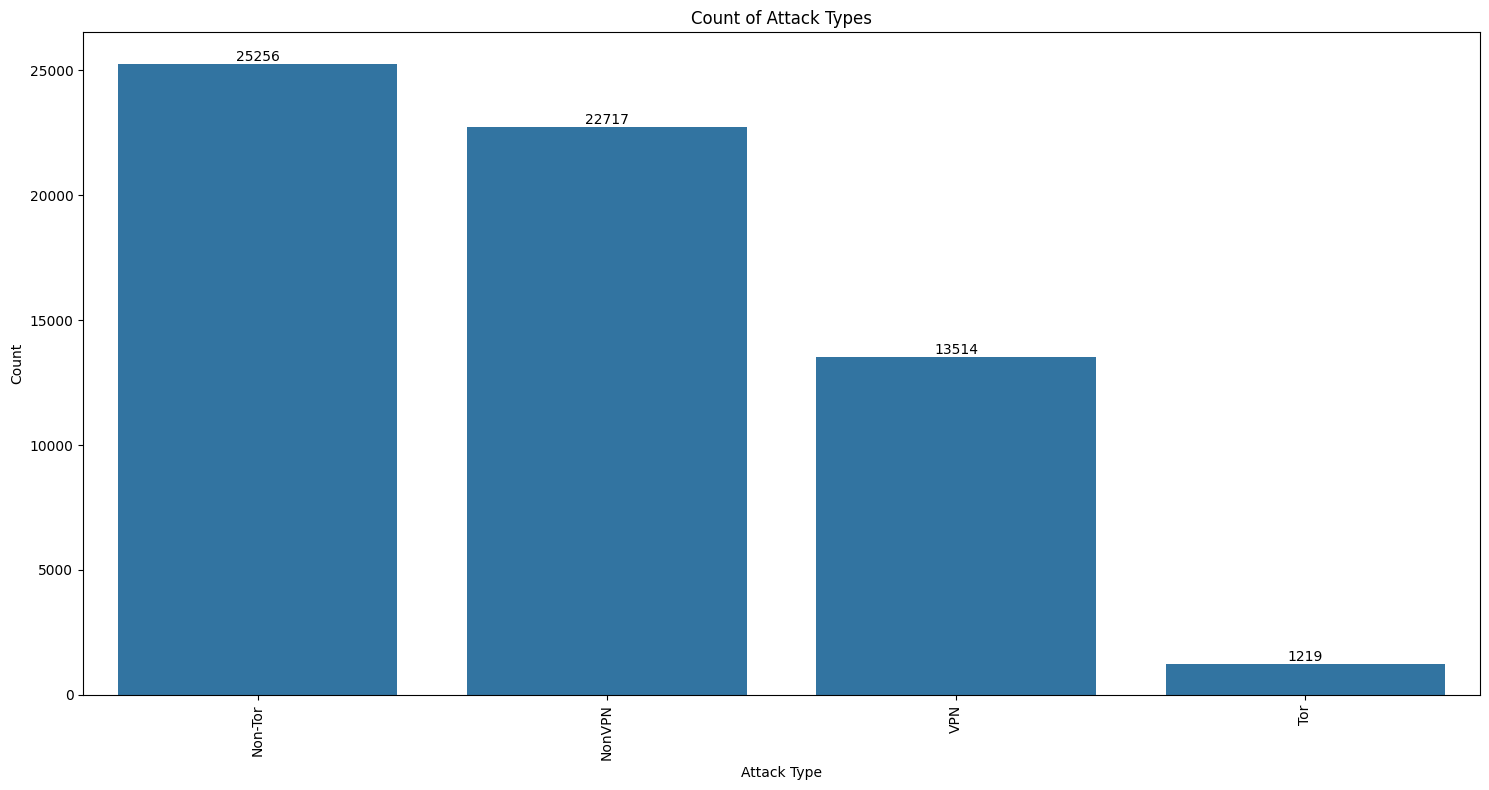

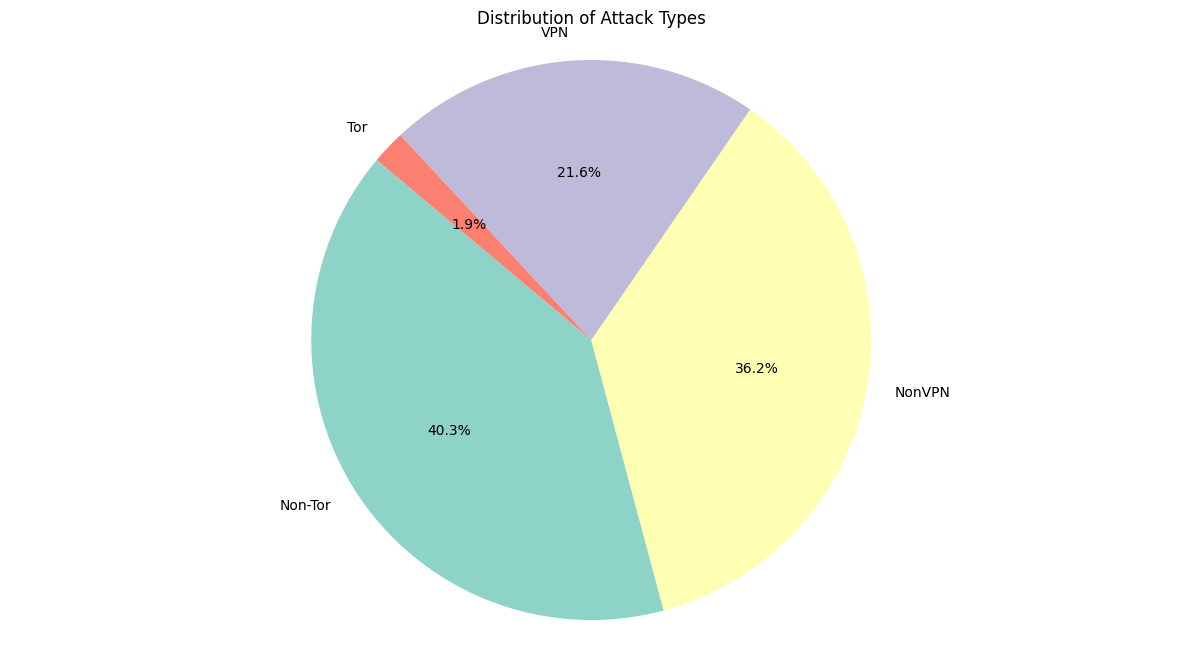

In [ ]:
plot_attack_type_distribution(df, col='Label-1')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string to numeric format using label encoding
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is of object data type (categorical)
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
Classes = label_encoder.classes_.tolist()
Classes

['Non-Tor', 'NonVPN', 'Tor', 'VPN']

# Model Building
  ### Performance Metrics
* Accuracy: It measures the proportion of correctly classified instances out of the total instances in the dataset. It's calculated as (TP + TN) / (TP + TN + FP + FN), where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.

* Precision: It measures the proportion of true positive predictions among all positive predictions made by the model. It's calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

* Recall (Sensitivity): It measures the proportion of true positive predictions among all actual positive instances in the dataset. It's calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

* F1 Score: It is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

* Confusion Matrix: It is a table that visualizes the performance of a classification model by comparing predicted labels with actual labels. It consists of four values: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

In [ ]:
import time

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler



# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
# lets extract the dependent and independent features
X = df.drop(['Label-1'], axis=1)
y = df['Label-1']

## Split the data
* Splitting the data into training and testing sets is a crucial step in machine learning model development. It allows us to evaluate the performance of our model on unseen data. Typically, we reserve a portion of the dataset for training the model and another portion for testing its performance.

* We often use an 80:20 or 70:30 split, where 80% or 70% of the data is used for training and the remaining 20% or 30% is used for testing, respectively. This ensures that the model learns patterns from the majority of the data while still having unseen data to evaluate its generalization performance.

In [ ]:
# Setting the random seed ensures reproducibility of results when using functions that involve randomization.
np.random.seed(42)

In [ ]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [ ]:
# lets split the dataset
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.2)

Training shape: (50164, 66)
Testing shape: (12542, 66)


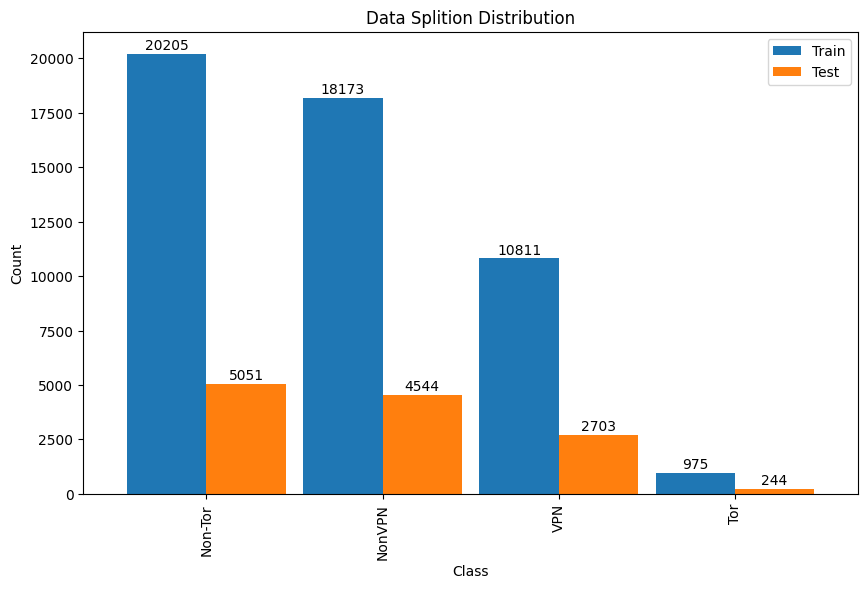

In [ ]:
# get the value counts
y_train_series = pd.Series(y_train).astype(int)
y_test_series = pd.Series(y_test).astype(int)

class_mapping = {index: class_name for index, class_name in enumerate(Classes)}

train_value_counts = y_train_series.map(class_mapping).value_counts()
test_value_counts = y_test_series.map(class_mapping).value_counts()


df = pd.DataFrame({'Train': train_value_counts, 'Test': test_value_counts})


fig, ax = plt.subplots(figsize=(10, 6))

# Create a grouped bar plot
ax = df.plot.bar(width=0.9, ax=ax)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=1)

# Set the labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Data Splition Distribution')

# Show the plot
plt.show()

## Normalize the Data
* Normalization, in the context of data analysis and machine learning, refers to the process of transforming numerical data into a standardized scale. The goal of normalization is to bring different features or variables onto a similar scale to ensure fair comparisons and improve the performance of certain algorithms.

In [ ]:
'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''

min_max_scaler = MinMaxScaler()

X_train_std = min_max_scaler.fit_transform(X_train)
X_test_std = min_max_scaler.transform(X_test)

In [ ]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train.columns)

#Biostatistics Test
### Feature Selection chi2
* The chi-squared (chi2) test for feature selection helps in identifying the most significant features by assessing the independence between the feature and the target. This statistical method ranks features based on their relevance to the target variable, allowing us to select the most influential ones for model training. It's particularly useful in scenarios where we aim to understand which features contribute most to distinguishing between classes in a classification problem.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [ ]:
features = SelectKBest(score_func=chi2, k=X_train_std.shape[1])

# fit features to the training dataset
fit = features.fit(X_train_std, y_train)

In [ ]:
def plot_feature_importance(X_train, fit, threshold=0.99, top=10):
    # Get the indices sorted by most important to least important
    indices = np.argsort(fit.scores_)[::-1]

    # To get feature names
    features_ = [X_train.columns[i] for i in indices]

    # Plot top 10 features
    plt.figure(figsize=(10,5))
    plt.bar(features_[:top], fit.scores_[indices][:top], color='r', align='center')
    plt.title(f"Top {top} Feature Importance")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(15,5))
    plt.bar(features_, fit.scores_[indices], color='r', align='center')
    plt.title(f"Feature Importance (threshold={threshold})")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Sort the features by importance score
    feature_importances = zip(X_train.columns, fit.scores_)
    feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
    sorted_importances = [importance[1] for importance in feature_importances]
    sorted_features = [importance[0] for importance in feature_importances]

    x_values = list(range(len(feature_importances)))

    # Plot the cumulative scores
    cumulative_importances = np.cumsum(sorted_importances)
    plt.figure(figsize=(15, 5))
    plt.plot(x_values, cumulative_importances)

    # Draw line at 99% of importance retained
    value99 = cumulative_importances[-1]*0.99

    plt.hlines(y=value99, xmin=0, xmax=len(sorted_importances), color='r', linestyles='dashed')
    plt.yticks([], [])
    plt.xlabel('Total Feature', fontsize=15)
    plt.title(f'A Chart to Show Cumulative Feature Scores (threshold={threshold})', fontsize=15)
    plt.tight_layout()
    plt.show()
    return features_[:top]

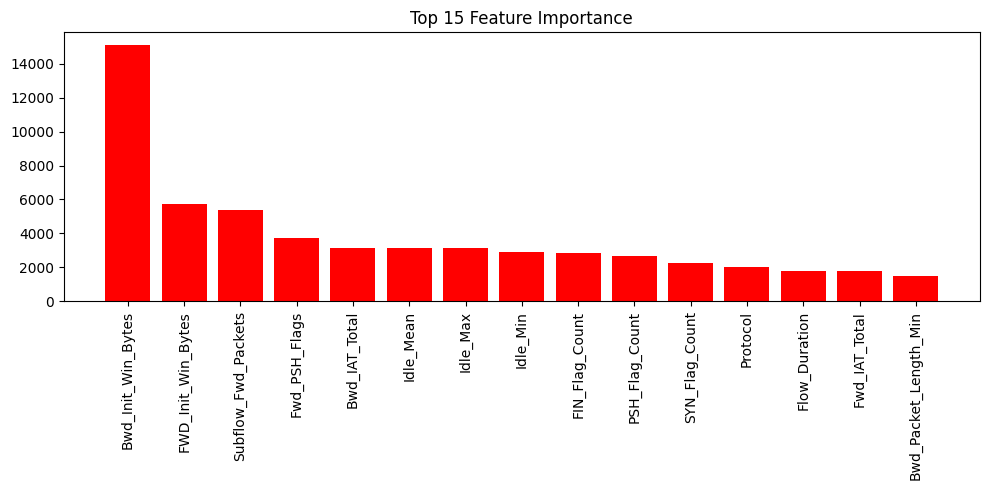

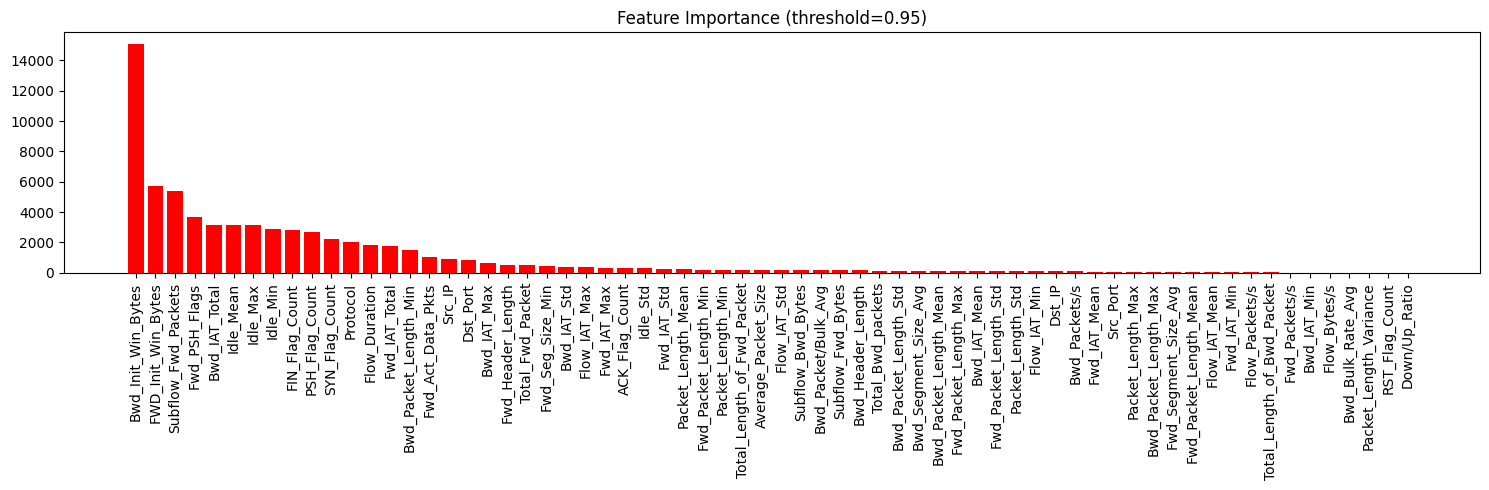

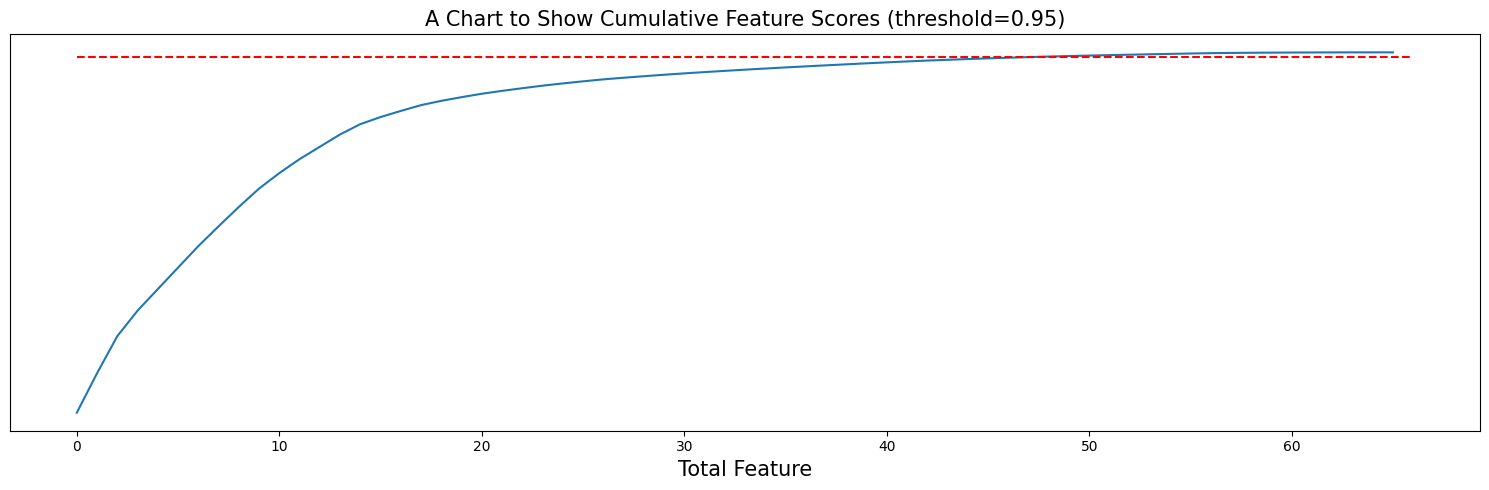

In [ ]:
top_features = plot_feature_importance(X_train, fit, threshold=0.95, top=15)

In [ ]:
top_features # print the top features

['Bwd_Init_Win_Bytes',
 'FWD_Init_Win_Bytes',
 'Subflow_Fwd_Packets',
 'Fwd_PSH_Flags',
 'Bwd_IAT_Total',
 'Idle_Mean',
 'Idle_Max',
 'Idle_Min',
 'FIN_Flag_Count',
 'PSH_Flag_Count',
 'SYN_Flag_Count',
 'Protocol',
 'Flow_Duration',
 'Fwd_IAT_Total',
 'Bwd_Packet_Length_Min']

In [ ]:
X_train_ = X_train[top_features]
X_test_ = X_test[top_features]
X_test_.head()

,Bwd_Init_Win_Bytes,FWD_Init_Win_Bytes,Subflow_Fwd_Packets,Fwd_PSH_Flags,Bwd_IAT_Total,Idle_Mean,Idle_Max,Idle_Min,FIN_Flag_Count,PSH_Flag_Count,SYN_Flag_Count,Protocol,Flow_Duration,Fwd_IAT_Total,Bwd_Packet_Length_Min
65924,0,0,1,0,0,0,0,0,0,0,0,17,418549,418549,0
36255,980,980,0,1,80371978,1456320000000000,1456320000000000,1456320000000000,0,4,0,6,115998093,115998093,0
59365,29,29200,0,0,418474,1427720000000000,1427720000000000,1427720000000000,0,4,2,6,539910,539910,0
55267,0,61,0,0,201,1427910000000000,1427910000000000,1427910000000000,1,1,0,6,248,208,0
10215,0,0,1,0,0,1432570000000000,1432570000000000,1432570000000000,0,0,0,17,3001178,3001178,0


In [ ]:
# normalize the features
min_max_scaler = MinMaxScaler()
X_train_std = min_max_scaler.fit_transform(X_train_)
X_test_std = min_max_scaler.transform(X_test_)

# make a dataframe
X_train_std = pd.DataFrame(X_train_std, columns = X_train_.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train_.columns)
X_test_std.head()

,Bwd_Init_Win_Bytes,FWD_Init_Win_Bytes,Subflow_Fwd_Packets,Fwd_PSH_Flags,Bwd_IAT_Total,Idle_Mean,Idle_Max,Idle_Min,FIN_Flag_Count,PSH_Flag_Count,SYN_Flag_Count,Protocol,Flow_Duration,Fwd_IAT_Total,Bwd_Packet_Length_Min
0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.003488,0.003488,0.0
1,0.014954,0.014954,0.0,1.0,0.669767,0.997479,0.997479,0.997479,0.0,0.000083,0.0,0.352941,0.966651,0.966651,0.0
2,0.000443,0.445563,0.0,0.0,0.003487,0.977890,0.977890,0.977890,0.0,0.000083,0.5,0.352941,0.004499,0.004499,0.0
3,0.000000,0.000931,0.0,0.0,0.000002,0.978021,0.978021,0.978021,0.5,0.000021,0.0,0.352941,0.000002,0.000002,0.0
4,0.000000,0.000000,1.0,0.0,0.000000,0.981212,0.981212,0.981212,0.0,0.000000,0.0,1.000000,0.025010,0.025010,0.0


In [ ]:
def results(model, y_pred, y_test, y_pred_train, y_train, classes, multi_class=False):
    if multi_class:
        accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train) * 100, 2)
        precision = round(precision_score(y_pred, y_test, average='macro') * 100, 2)
        recall = round(recall_score(y_pred, y_test, average='macro') * 100, 2)
        f1_scr = round(f1_score(y_pred, y_test, average='macro') * 100, 2)
    else:
        accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train) * 100, 2)
        precision = round(precision_score(y_pred, y_test) * 100, 2)
        recall = round(recall_score(y_pred, y_test) * 100, 2)
        f1_scr = round(f1_score(y_pred, y_test) * 100, 2)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)


    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=classes))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(7, 5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                             ax=ax,
                                             display_labels=classes,
                                             xticks_rotation='vertical')
    plt.show()

    return {
        'Model': model.__class__.__name__,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [ ]:
def train_model(model,X_train,y_train,X_test,y_test, labelEncoder, multi_class=None):
    # Record the start time
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Record the end time
    end_time = time.time()

    # Compute the training time in seconds
    training_time = end_time - start_time
    print(f"Training time: {training_time:.3f} seconds")

    # predict the model on testing data
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    # get results
    RESULTS_LR = results(model, y_pred, y_test,y_pred_train, y_train, labelEncoder, multi_class)

    # Add the training time to RESULTS_LR
    RESULTS_LR['Training time (s)'] = training_time

    return RESULTS_LR, model

In [ ]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

### LogisticRegression

Training time: 3.991 seconds

Training Accuracy: 64.08%
Testing Accuracy: 63.59%
Precision: 67.27%
Recall: 57.5%
F1-Score: 59.77%

Classification Report:
              precision    recall  f1-score   support

     Non-Tor       0.75      0.71      0.73      5337
      NonVPN       0.54      0.75      0.63      3263
         Tor       0.83      0.39      0.53       520
         VPN       0.57      0.45      0.51      3422

    accuracy                           0.64     12542
   macro avg       0.67      0.58      0.60     12542
weighted avg       0.65      0.64      0.63     12542


Confusion Matrix:


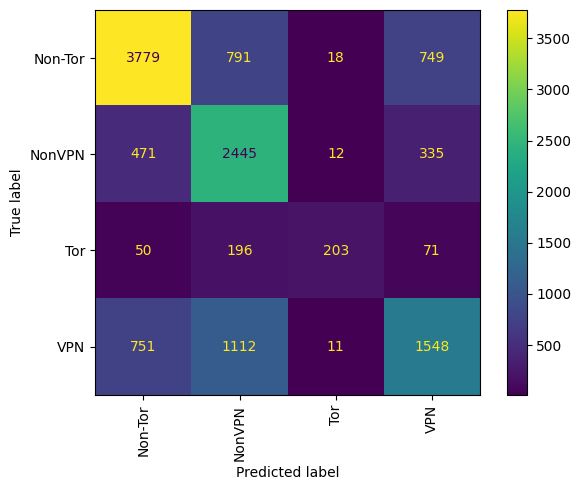

In [ ]:
model = LogisticRegression(class_weight='balanced')
res, model_lr = train_model(model,X_train_std,y_train,X_test_std,y_test, Classes, multi_class=True)
lr_res = get_model_results(res)

### DecisionTreeClassifier

Training time: 0.288 seconds

Training Accuracy: 79.69%
Testing Accuracy: 79.34%
Precision: 79.42%
Recall: 73.66%
F1-Score: 75.74%

Classification Report:
              precision    recall  f1-score   support

     Non-Tor       0.89      0.97      0.93      4628
      NonVPN       0.74      0.81      0.77      4117
         Tor       0.84      0.61      0.71       337
         VPN       0.71      0.55      0.62      3460

    accuracy                           0.79     12542
   macro avg       0.79      0.74      0.76     12542
weighted avg       0.79      0.79      0.79     12542


Confusion Matrix:


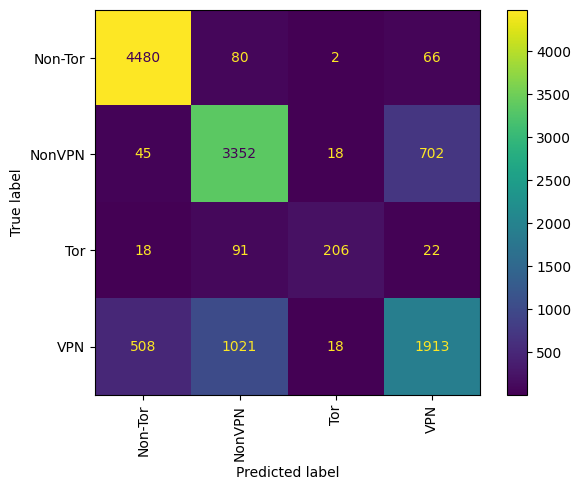

In [ ]:
model = DecisionTreeClassifier(criterion='gini',
                              max_depth=5 ,
                              min_samples_split=10,
                              min_samples_leaf=22,
                              class_weight='balanced'
                             )
res, model_dt = train_model(model,X_train_std,y_train,X_test_std,y_test, Classes, multi_class=True)
dt_res = get_model_results(res)

### Navie Bayes

Training time: 0.024 seconds

Training Accuracy: 61.5%
Testing Accuracy: 60.93%
Precision: 64.95%
Recall: 54.9%
F1-Score: 56.19%

Classification Report:
              precision    recall  f1-score   support

     Non-Tor       0.73      0.66      0.69      5639
      NonVPN       0.48      0.77      0.59      2849
         Tor       0.81      0.32      0.46       620
         VPN       0.57      0.45      0.50      3434

    accuracy                           0.61     12542
   macro avg       0.65      0.55      0.56     12542
weighted avg       0.64      0.61      0.61     12542


Confusion Matrix:


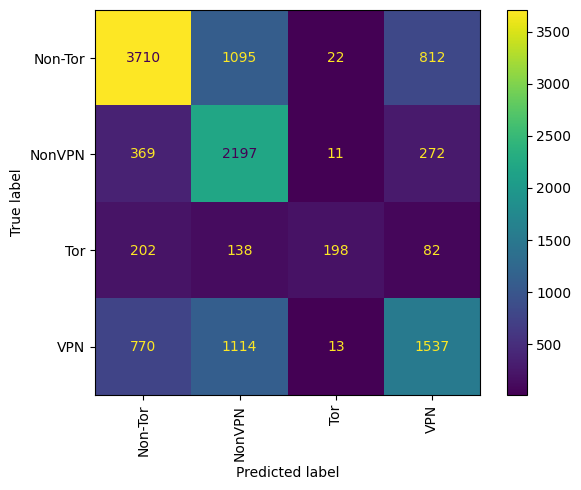

In [ ]:
model = GaussianNB()
res, model_gnb = train_model(model,X_train_std,y_train,X_test_std,y_test, Classes, multi_class=True)
nb_res = get_model_results(res)

### RandomForestClassifier

Training time: 10.734 seconds

Training Accuracy: 98.35%
Testing Accuracy: 96.28%
Precision: 94.78%
Recall: 95.4%
F1-Score: 95.07%

Classification Report:
              precision    recall  f1-score   support

     Non-Tor       0.99      0.99      0.99      5066
      NonVPN       0.97      0.94      0.96      4676
         Tor       0.93      0.93      0.93       243
         VPN       0.90      0.95      0.92      2557

    accuracy                           0.96     12542
   macro avg       0.95      0.95      0.95     12542
weighted avg       0.96      0.96      0.96     12542


Confusion Matrix:


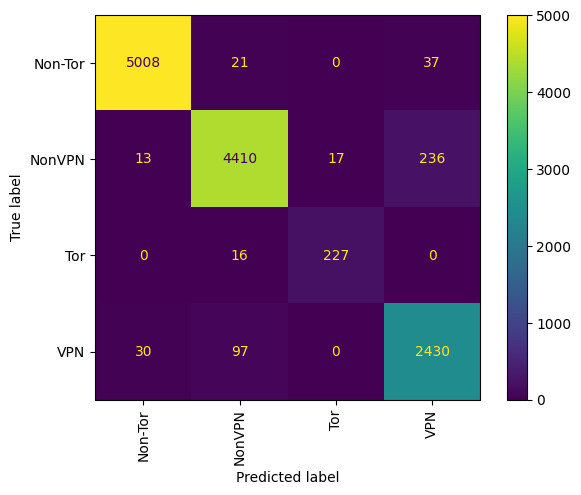

In [ ]:
model = RandomForestClassifier(class_weight='balanced')
res, model_rf = train_model(model,X_train_std,y_train,X_test_std,y_test, Classes, multi_class=True)
rf_res = get_model_results(res)

# Models Evaluation

In [ ]:
models_pd = pd.concat([lr_res, dt_res, nb_res, rf_res]).reset_index()
models_pd

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1,Training time (s)
0,LogisticRegression,64.08,63.59,67.27,57.50,59.77,3.991106
1,DecisionTreeClassifier,79.69,79.34,79.42,73.66,75.74,0.288194
2,GaussianNB,61.50,60.93,64.95,54.90,56.19,0.023787
3,RandomForestClassifier,98.35,96.28,94.78,95.40,95.07,10.733964


## <font color='magma'> Among the models, the RandomForestClassifier performs the best with the highest testing accuracy (96.28%), precision (94.78%), recall (95.40%), and F1 score (95.07%), despite having a longer training time. This indicates it is the most effective model for the given dataset, providing the most accurate and reliable predictions compared to the other models.

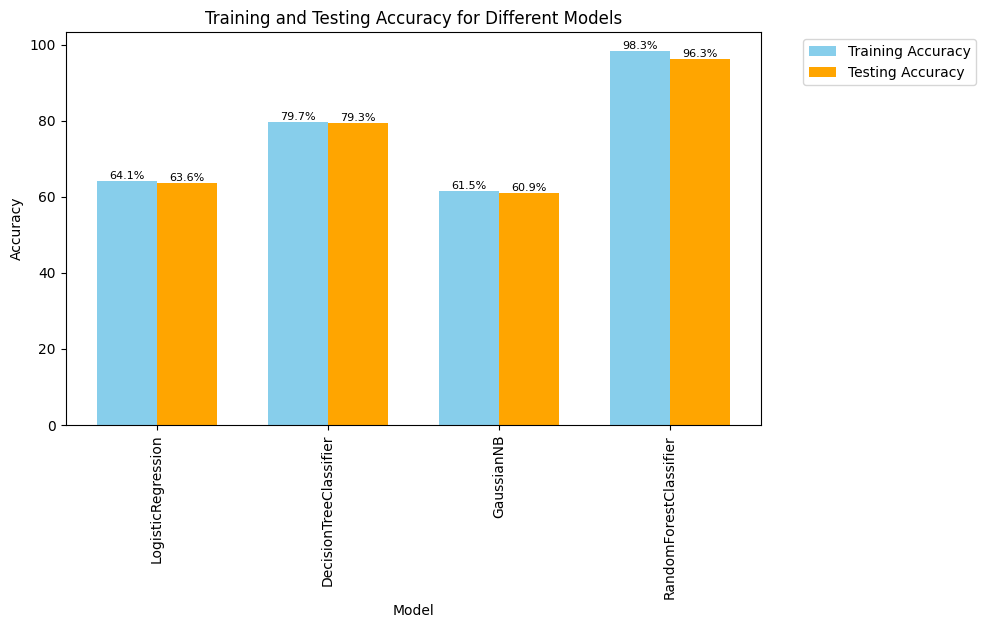

In [ ]:
plt.figure(figsize=(10, 6))

index = np.arange(len(models_pd['Model']))
bar_width = 0.35

training_accuracy = plt.bar(index, models_pd['Training Accuracy'], bar_width, label='Training Accuracy', color='skyblue')
testing_accuracy = plt.bar(index + bar_width, models_pd['Testing Accuracy'], bar_width, label='Testing Accuracy', color='orange')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, '{:.1f}%'.format(height),
                 ha='center', va='bottom', fontsize=8)

autolabel(training_accuracy)
autolabel(testing_accuracy)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different Models')
plt.xticks(index + bar_width / 2, models_pd['Model'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

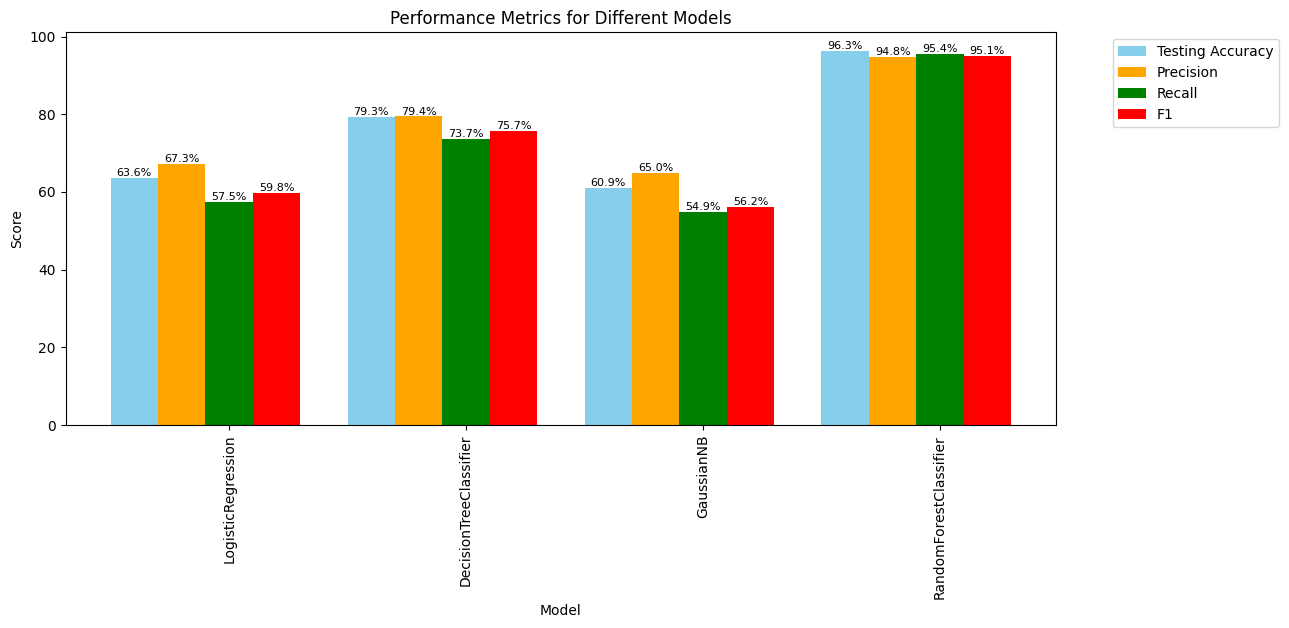

In [ ]:
plt.figure(figsize=(13, 6))

index = np.arange(len(models_pd['Model']))
bar_width = 0.2

accuracy = plt.bar(index, models_pd['Testing Accuracy'], bar_width, label='Testing Accuracy', color='skyblue')
precision = plt.bar(index + bar_width, models_pd['Precision'], bar_width, label='Precision', color='orange')
recall = plt.bar(index + 2 * bar_width, models_pd['Recall'], bar_width, label='Recall', color='green')
f1 = plt.bar(index + 3 * bar_width, models_pd['F1'], bar_width, label='F1', color='red')

# Add text labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, '{:.1f}%'.format(height),
                 ha='center', va='bottom', fontsize=8)

# Customize the plot
autolabel(accuracy)
autolabel(precision)
autolabel(recall)
autolabel(f1)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.xticks(index + 2 * bar_width, models_pd['Model'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()